# Determining the persistence length of a polymer

Here we determine the persistence length of a polymer.

**Last updated:** December 2022 with MDAnalysis 2.4.0-dev0

**Minimum version of MDAnalysis:** 1.0.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests

In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TRZ_psf, TRZ
from MDAnalysis.analysis import polymer
%matplotlib inline

## Loading files

The test files we will be working with here feature a pure polymer melt of a polyamide.

In [2]:
u = mda.Universe(TRZ_psf, TRZ)

## Choosing the chains and backbone atoms

We can define the chains of polyamide to be the common definition of a molecule: where each atom is bonded to at least one other in the group, and not bonded to any atom outside the group. MDAnalysis provides these as `fragments`.

In [3]:
chains = u.atoms.fragments

We then want to select only the backbone atoms for each chain, i.e. only the carbons and nitrogens.

In [4]:
backbones = [ch.select_atoms('not name O* H*') for ch in chains]

This should give us AtomGroups where the spatial arrangement is linear. However, the atoms are in index order. We can use `sort_backbone` to arrange our atom groups into their linear arrangement order.

In [5]:
sorted_bb = [polymer.sort_backbone(bb) for bb in backbones]

## Calculating the persistence length

The persistence length is the length at which two points on the polymer chain become decorrelated. This is determined by first measuring the autocorrelation $C(n)$ of two bond vectors $(\mathbf{a}_i, \mathbf{a}_{i + n})$ separated by $n$ bonds, where

$$ C(n) = \langle \cos\theta_{i, i+n} \rangle = \langle \mathbf{a_i} \cdot \mathbf{a_{i+n}} \rangle $$

An exponential decay is then fitted to this, which yields the persistence length $l_P$ from the average bond length $\bar{l_B}$.

$$ C(n) \approx \exp\left( - \frac{n \bar{l_B}}{l_P} \right)$$

We set up our `PersistenceLength` class ([API docs](https://docs.mdanalysis.org/stable/documentation_pages/analysis/polymer.html)). Note that every chain we pass into it must have the same length.

In [6]:
plen = polymer.PersistenceLength(sorted_bb)
plen.run()

The average bond length is found at `plen.results.lb`, the calculated persistence length at `plen.results.lp`, the measured autocorrelation at `plen.results` and the modelled decorrelation fit at `plen.results.fit`.

In [20]:
print(plen.results.fit.shape)
print('The persistence length is {:.3f}'.format(plen.results.lp))

(179,)
The persistence length is 6.917


`MDAnalysis.analysis.polymer.PersistenceLength` provides a convenience method to plot the results.

<AxesSubplot:xlabel='x', ylabel='$C(x)$'>

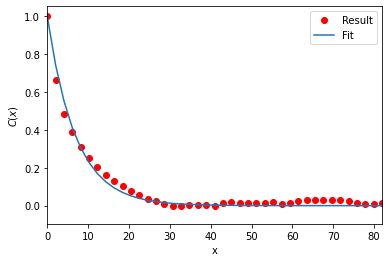

In [21]:
plen.plot()

## References

[1] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[2] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.